# ReadMe for Replication

1. doiwnload from koren et al 
2. chnage columns: 
    - first col: 1--> chr1 (for consistent formatting across tracks) 
    - add end col (so tabix understands--> only one base after 
3. tabix seperate 

### About the data 

In [76]:
!zcat Replication_chr01.txt.gz | head -n 10

chr1	150	151	0.117903
chr1	275	276	0.117110
chr1	501	502	0.115675
chr1	4752	4753	0.088693
chr1	6158	6159	0.079770
chr1	7266	7267	0.072738
chr1	10146	10147	0.054466
chr1	37048	37049	-0.115575
chr1	44296	44297	-0.161089
chr1	46295	46296	-0.173614

gzip: stdout: Broken pipe


- gaps 
   - average: 1257.72167087 (see code chunks way below in appendix ) 
   - max: 30009395
   - min: 1
   - gaps > 1M bp correspond in size to the centromeres of that chromosome (only 21 such gaps) 

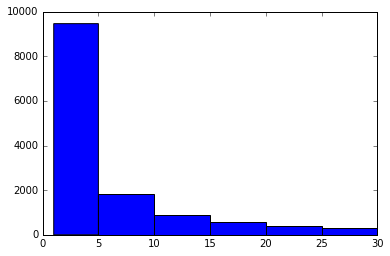

In [14]:
plt.hist(x= list_positive_differences, bins = [1,5,10,15,20,25,30])
plt.show()

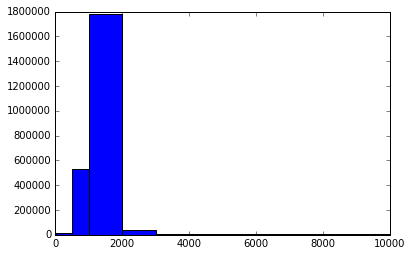

In [16]:
plt.hist(x= list_positive_differences, bins = [1,25, 500,1000,2000,3000,5000,10000])
plt.show()

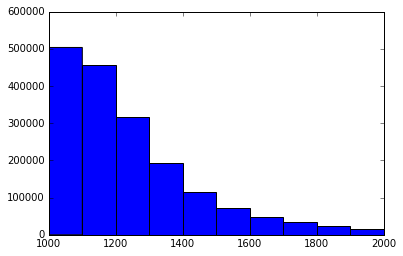

In [17]:
plt.hist(x= list_positive_differences, bins = [1000, 1100,1200,1300,1400,1500,1600,1700,1800,1900,2000])
plt.show()

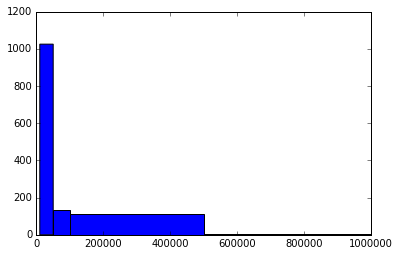

In [160]:
plt.hist(x= list_positive_differences, bins = [10000, 50000,100000, 500000, 1000000])
plt.show()

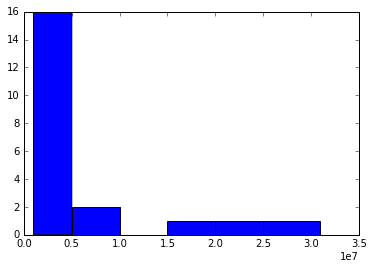

In [109]:
plt.hist(x= list_positive_differences, bins = [1000000, 5000000, 10000000,15000000,20000000,25000000,31000000])
plt.show()

___
### Producing the data: 

**1-- dpownload the data ** 
   - website: http://mccarrolllab.org/resources/
   - paper outlining protocol: Koren et al. Differential relationship of DNA replication timing to different forms of human mutation and recombination.  Am J Hum Genet, 2012.

**2 -- lets try and edit that first coloumn ** 

In [64]:
!cat koren_no_e_numbers.tmp.txt | head -n 2

1	150	0.117903
1	275	0.117110
cat: write error: Broken pipe


In [66]:
##chnage the first coloumn to have chr# and add a second coloumn for the end site that is one more than start (size = 1) 
replication_readlines = open('koren_no_e_numbers.tmp.txt').readlines()
with open('out1.txt', 'w') as f:
    for i in range(0,len(replication_readlines)): 
        row_split = replication_readlines[i].split()
        chr_num = row_split[0]
        chrom = "chr"+chr_num
        new_row = [chrom, row_split[1], str(int(row_split[1])+1), str(row_split[2])]
        f.write(new_row[0]+"\t"+new_row[1]+"\t"+new_row[2]+"\t"+new_row[3]+"\n")
        

In [67]:
!cat out1.txt | head -n 2

chr1	150	151	0.117903
chr1	275	276	0.117110
cat: write error: Broken pipe


In [70]:
%%bash 
bgzip out1.txt 
tabix -s 1 -b 2 -e 3 out1.txt.gz

In [72]:
%%bash 
for i in {1..9}
do 
    tabix out1.txt.gz chr$i > Replication_chr0$i.txt
    bgzip -f Replication_chr0$i.txt
    tabix -s 1 -b 2 -e 3 Replication_chr0$i.txt.gz
done 

for i in {10..22}
do 
    tabix out1.txt.gz chr$i > Replication_chr$i.txt
    bgzip -f Replication_chr$i.txt
    tabix -s 1 -b 2 -e 3 Replication_chr$i.txt.gz
done 

### ** appendix ** 

#### 1.1 getting the average and max/min gap size 

In [6]:
Koren_file = open("koren_no_e_numbers.tmp.txt")
Koren_lines = Koren_file.readlines()

In [7]:
print(str(len(Koren_lines)))

2383437


In [8]:
list_of_starts = []
for line in Koren_lines: 
    list_of_starts.append(line.split()[2])

In [18]:
len(list_of_starts)

2383437

In [9]:
print(Koren_lines[0])

list_of_differences = list()

for i in range(0,len(list_of_starts)-2): 
    line_split1 = Koren_lines[i].split('\t')
    line_split2 = Koren_lines[i+1]. split('\t')
    difference = int(line_split2[1]) - int(line_split1[1])
    list_of_differences.append(difference)
print(len(list_of_differences))

1	150	0.117903

2383435


In [10]:
list_positive_differences = list()
number_negs = int()
for element in list_of_differences: 
    if element > 0: 
        list_positive_differences.append(element)
    else: 
        number_negs += 1
        
print(number_negs)

23


In [11]:
import numpy 
import matplotlib.pyplot as plt

In [12]:
#now lets get that info : 
print(numpy.average(list_positive_differences))
print(max(list_positive_differences))
print(min(list_positive_differences))
print(type(list_positive_differences))
print(list_positive_differences[0:10])

1257.72167087
30009395
1
<class 'list'>
[125, 226, 4251, 1406, 1108, 2880, 26902, 7248, 1999, 2921]


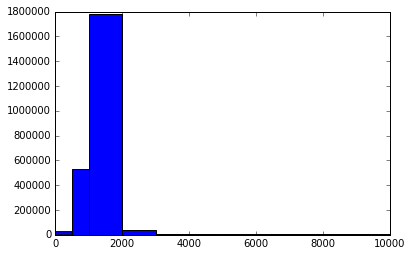

In [100]:
plt.hist(x= list_positive_differences, bins = [1,500,1000,2000,3000,5000,10000])
plt.show()

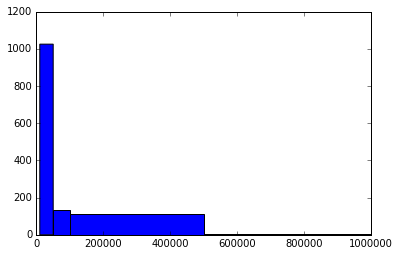

In [115]:
plt.hist(x= list_positive_differences, bins = [10000, 50000,100000, 500000, 1000000])
plt.show()

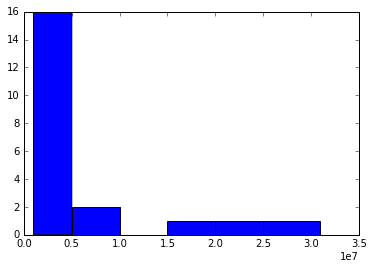

In [109]:
plt.hist(x= list_positive_differences, bins = [1000000, 5000000, 10000000,15000000,20000000,25000000,31000000])
plt.show()

### Find where in the genome are the 1b< gaps. (looks like there are about 21) 
- note that the index of the big gap in the "list_positive_difference" will be approximately the idex of the line in the file

In [155]:
list_big_differences = {}
for element in list_positive_differences: 
    if element >= 1000000: 
        index = list_positive_differences.index(element)
        if element in list_big_differences.keys(): 
            print("overwrite error")
            break
        else: 
            #print(index)
            list_big_differences[element] = ["chr"+str(Koren_lines[index].split()[0]), Koren_lines[index].split()[1],Koren_lines[index+1].split()[1]]
            #list_big_differences[element] = [Koren_lines[index-1], Koren_lines[index], Koren_lines[index+1], Koren_lines[index+2]]
print(list_big_differences)

{3005857: ['chr11', '51447846', '51447851'], 8012130: ['chr19', '24382263', '24383021'], 4402723: ['chr3', '90583318', '90584609'], 3012100: ['chr7', '58022694', '58023832'], 3002151: ['chr4', '49354299', '49354410'], 1767208: ['chr20', '26252499', '26253655'], 2481852: ['chr10', '39183685', '39184597'], 1001290: ['chr20', '28265113', '28265198'], 1397863: ['chr12', '34734290', '34735324'], 18187405: ['chr9', '46995787', '46997442'], 9801902: ['chr16', '35127046', '35128172'], 3001648: ['chr2', '91688911', '91689432'], 20290225: ['chr1', '121186956', '141477181'], 30009395: ['chr24', '27139289', '27146866'], 1003607: ['chr2', '89952808', '89955464'], 3017272: ['chr23', '58538742', '58541017'], 3008228: ['chr8', '43947103', '43947194'], 3051194: ['chr21', '10207858', '10208056'], 3051900: ['chr6', '58887363', '58887366'], 3002013: ['chr5', '46434627', '46436013'], 1364798: ['chr18', '15395619', '15396025']}


In [156]:
for key in list_big_differences.keys(): 
    if key >= 20000000: 
        print(list_big_differences[key])
        print(key)

['chr1', '121186956', '141477181']
20290225
['chr24', '27139289', '27146866']
30009395


In [149]:
print(Koren_lines[100975])
print(Koren_lines[100976])

1	121186956	0.256550

1	141477181	-0.885094



In [158]:
for key in list_big_differences.keys():
    print(list_big_differences[key][0]+"    "   +str(key))

chr11    3005857
chr19    8012130
chr3    4402723
chr7    3012100
chr4    3002151
chr20    1767208
chr10    2481852
chr20    1001290
chr12    1397863
chr9    18187405
chr16    9801902
chr2    3001648
chr1    20290225
chr24    30009395
chr2    1003607
chr23    3017272
chr8    3008228
chr21    3051194
chr6    3051900
chr5    3002013
chr18    1364798


#### ** are the large gaps centromeres? **
- went to table browser UCSC > all tables > hg18 > gap
- genome's worth, but filtered for "centromere" in the "type" coloumn (see table schema for details) 
- output file into home dekstop and uploaded to server "hg18_centromere" file 

In [128]:
import pandas

In [138]:
hg18_centromeres_df = pandas.read_table("hg18_centromere")
print(hg18_centromeres_df[14:15])

                                                    #filter: chr1_gap.type = 'centromere'
15 chr11 51450781 54450781 443 N 3000000 centromere                                    no


In [127]:
for line in hg18_centromeres_lines: 
    print(line)

#filter: chr1_gap.type = 'centromere'

#bin	chrom	chromStart	chromEnd	ix	n	size	type	bridge

23	chr1	121236957	123476957	1269	N	2240000	centromere	no

2	chr2	91689898	94689898	758	N	3000000	centromere	no

2	chr3	90587544	93487544	772	N	2900000	centromere	no

1	chr4	49354874	52354874	435	N	3000000	centromere	no

14	chr5	46441398	49441398	451	N	3000000	centromere	no

16	chr6	58938125	61938125	629	N	3000000	centromere	no

1	chr7	58058273	61058273	559	N	3000000	centromere	no

14	chr8	43958052	46958052	372	N	3000000	centromere	no

14	chr9	47107499	50107499	409	N	3000000	centromere	no

1	chrX	58598737	61598737	578	N	3000000	centromere	no

10	chrY	11253954	11653954	106	N	400000	centromere	no

678	chrY	12208578	12308578	111	N	100000	centromere	no

13	chr10	39244941	41624941	341	N	2380000	centromere	no

15	chr11	51450781	54450781	443	N	3000000	centromere	no

13	chr12	34747961	36142961	301	N	1395000	centromere	no

1	chr13	16000000	17868000	2	N	1868000	centromere	no

1	chr14	15070000	18070000	2	N